### Get Data
- In this Notebook are generated the data using in this Notebook.
- Simple data using the libraries of sklearn make_regression

In [1]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

### -1. Root repo

In [2]:
import os
# get actual path
actual_path = os.path.abspath(os.getcwd())

# divide each folder in the path in a list
# delete the last element to get the root path of the local folder
list_root_path = actual_path.split('\\')[:-1]

# join the list in a string with the root
root_path = '\\'.join(list_root_path)

# pararme en el root obtenido
os.chdir(root_path)

print('before: ', actual_path)
print('after: ', root_path)

before:  D:\Github-mi-repo\Discovery-ensembles-stackings-methods\discovery
after:  D:\Github-mi-repo\Discovery-ensembles-stackings-methods


### 0. Parameters

In [3]:
# parameters my example
N_SAMPLES = 1000
N_FEATURES = 20
N_INFORMATIVE = 15
N_REDUNDANT = 5 # for classification
NOISE = 0.1 # for regression
RANDOM_STATE = 1

### 1. Crear data set regression problem

In [4]:
def get_dataset_regression(n_samples, n_features, n_informative, noise, random_state):
    
    # generate data
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)
    
    # save in a dataframe X
    columns_name = ['feature_' + str(x + 1) for x in range(N_FEATURES)]
    X = pd.DataFrame(X, columns = columns_name)
    
    # save in a dataframe y
    target_name = ['target']
    y = pd.DataFrame(y, columns = target_name)
    
    return X, y

In [5]:
data_X, data_y = get_dataset_regression(n_samples = N_SAMPLES, 
                                        n_features = N_FEATURES, 
                                        n_informative = N_INFORMATIVE, 
                                        noise = NOISE, 
                                        random_state = RANDOM_STATE)

### 2. Explorar dataset regression

In [6]:
# describe X
data_X.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.056084,-0.015319,0.055827,0.009675,-0.024945,0.078827,0.026348,0.108170,0.016372,0.012404,0.007783,0.001891,-0.025278,0.046006,-0.008132,0.033098,-0.032344,-0.051946,0.009081,0.000649
std,0.981909,1.018700,0.978702,0.999217,1.000598,1.001402,0.999948,0.972542,1.029161,1.013300,1.047265,1.000748,1.009519,0.949042,0.992944,0.968213,1.018290,0.985777,1.005182,1.016334
min,-3.451403,-3.026057,-2.854054,-3.053764,-2.928240,-3.029344,-3.173462,-3.310843,-3.294858,-2.886694,-3.259206,-3.260615,-3.165210,-2.802132,-2.857528,-3.038443,-3.219132,-3.280328,-2.593950,-3.656440
25%,-0.709866,-0.717228,-0.620949,-0.641885,-0.714177,-0.601430,-0.612811,-0.555532,-0.650651,-0.684175,-0.729966,-0.664577,-0.696836,-0.609191,-0.670491,-0.656889,-0.680829,-0.728922,-0.621980,-0.748177
50%,-0.109330,-0.036503,0.029781,-0.006801,-0.075798,0.112755,0.029501,0.140186,0.032963,0.009456,-0.012277,0.041527,-0.000059,0.049471,-0.029780,0.047522,-0.035574,-0.046177,0.014929,0.045931
75%,0.585775,0.674337,0.657816,0.651159,0.685876,0.749400,0.700829,0.793501,0.707084,0.714692,0.701495,0.661980,0.662391,0.737972,0.655990,0.679880,0.617424,0.608848,0.651087,0.744313
max,4.026849,3.118480,4.168118,3.446956,3.106749,3.834381,2.717386,3.077079,3.238343,3.432663,3.560873,2.854424,3.135047,2.890808,3.398116,2.843572,2.975525,3.958603,2.839148,2.857734


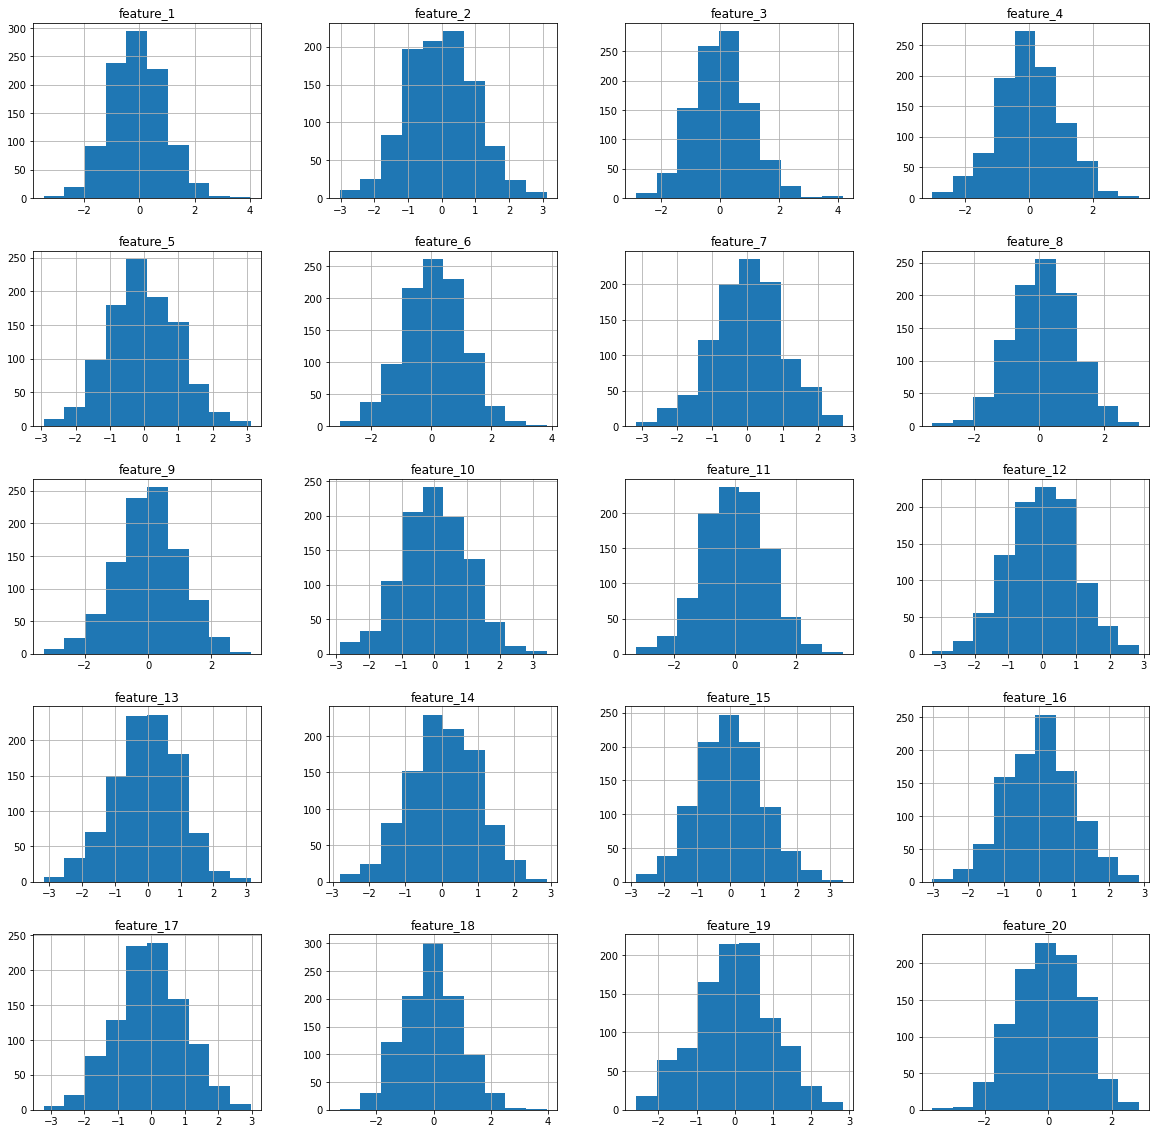

In [7]:
# histogram X
data_X.hist(figsize = (20, 20))
plt.show()

In [8]:
# describe y
data_y

,target
0,419.492854
1,524.804188
2,51.875935
3,-36.962860
4,-218.301260
...,...
995,-168.380267
996,-23.927515
997,-38.627039
998,64.135404


array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

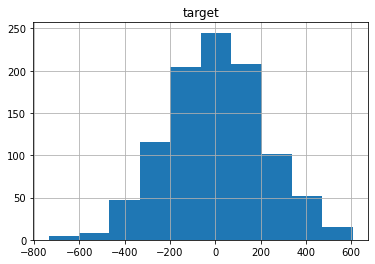

In [9]:
# histogram y
data_y.hist()

In [10]:
data_X.shape

(1000, 20)

In [11]:
def corr_features_target_plot(df_corr):
    '''
    Input a dataframe with correlations
    Output: plot of corr
    '''
    mask = np.triu(df_corr)
    plt.figure(figsize = (20,20))
    sns.heatmap(df_corr, annot=True, mask=mask)

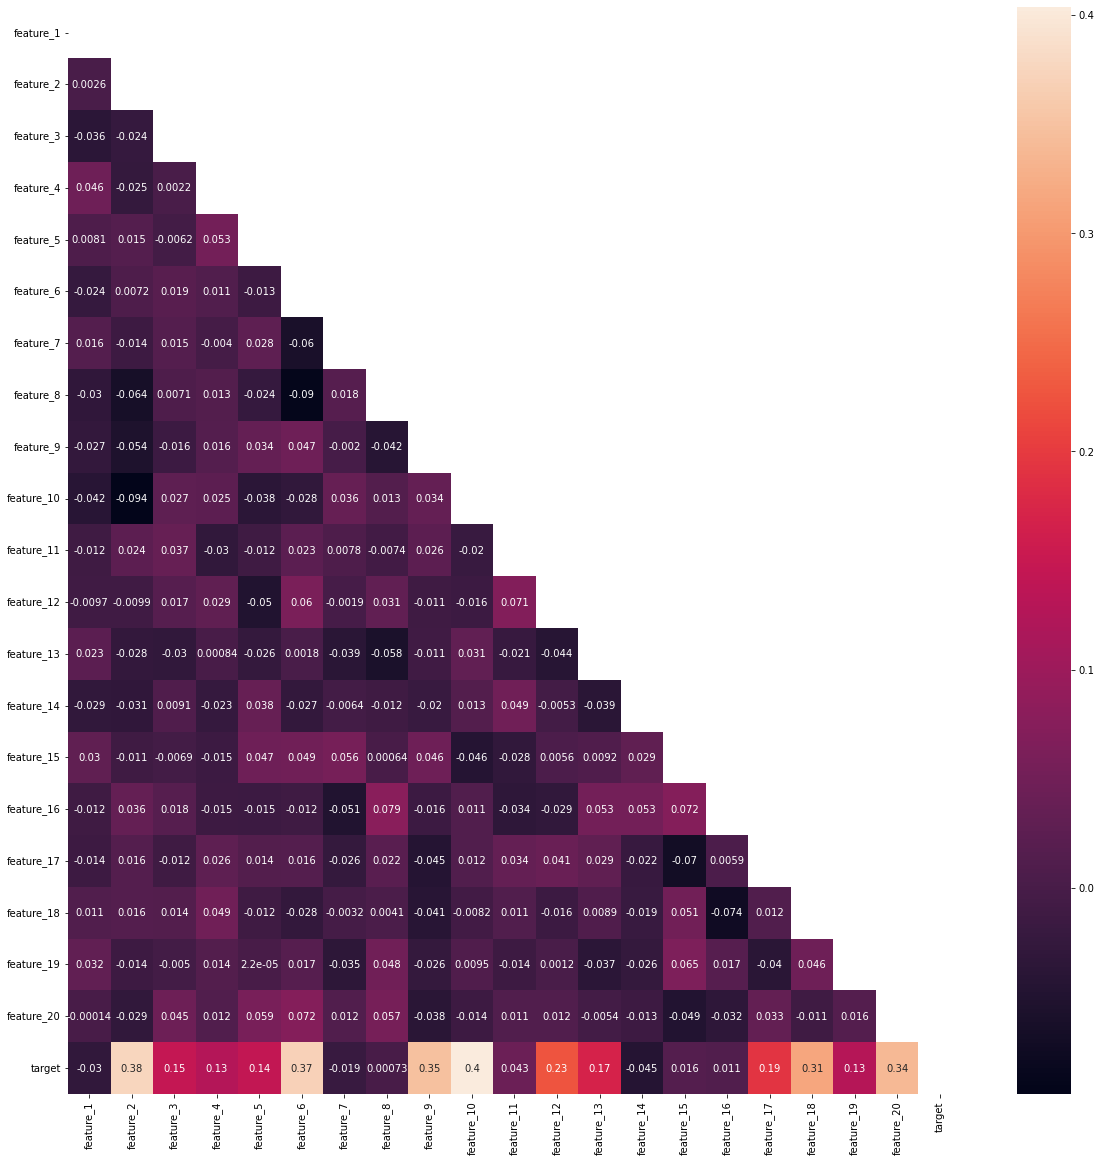

In [12]:
# correlations between features (each others) and target
aux = data_X.copy()
aux['target'] = data_y

corr_features_target_plot(aux.corr())

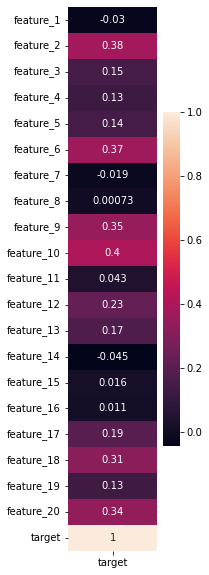

In [13]:
def corr_target(df_corr):
    plt.figure(figsize = (2,10))
    sns.heatmap(df_corr, annot=True) 
    
corr_target(aux.corr()[['target']])

### 3. Split train and test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    data_X, data_y, test_size = 0.2, random_state = 42, shuffle = True
)

In [24]:
X_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
29,-1.995385,-1.106284,0.408620,2.301561,0.710566,-1.363265,0.300689,1.666730,-0.614568,-1.593148,-0.520462,0.162110,0.367004,-0.841445,0.272641,2.777053,0.554050,-0.982133,0.990264,1.869022
535,0.010661,-0.658246,0.359218,1.238966,-0.507023,0.594138,-0.281895,2.167018,0.022403,-0.020703,-1.274798,-1.085116,-0.156883,-0.592505,2.149781,0.232102,-1.815053,0.598097,-0.239900,-0.075189
695,-0.376360,1.694051,0.521170,-0.362023,0.031908,0.779844,0.205317,-0.365738,-1.218773,0.876808,-0.919975,1.784666,1.121288,-0.072041,0.397112,0.943157,-0.666177,-0.412654,0.661291,0.472427
557,0.507847,-0.218312,3.026218,0.049840,-0.004788,-0.375794,0.800371,1.269116,-0.989543,-1.192338,0.444147,-0.733748,0.496937,-0.150136,-1.165367,0.687832,-0.123266,-1.062041,-2.008760,0.308994
836,0.382860,-0.264093,-0.697484,-0.989610,-0.266891,0.577682,-0.066127,1.648568,0.486952,-0.853560,1.174563,0.397240,-0.782204,-0.453976,-0.035720,-0.529858,1.299482,-0.983235,-1.658660,-0.770401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.358476,-0.686948,-0.964105,-0.152610,-1.257772,0.936037,-1.543320,0.951289,2.058050,0.077100,0.066704,-0.238146,-0.955306,0.649484,0.231941,1.552188,0.982495,0.230960,-2.397708,0.691128
270,0.030525,-1.409971,-0.344289,-2.088347,0.057692,0.368666,-1.370854,-0.351692,-0.195021,1.158382,0.472136,-1.217846,0.608355,1.162589,-0.636735,-0.060817,-1.974248,0.104632,0.432852,-1.499163
860,0.943132,1.627132,1.750368,1.564038,-1.870065,-2.142776,0.075341,-1.094177,-1.203095,1.180263,0.713558,0.120974,-0.162217,-0.468041,0.484649,0.446406,1.366073,0.225399,-0.094122,-0.003845
435,0.516391,-1.712607,0.553688,-1.898093,0.829046,-2.723177,-1.168252,0.230477,-0.607068,-0.307723,-0.862294,0.330957,0.342544,-0.757693,-0.401069,1.613144,-0.634683,-0.052696,0.258123,0.213947


### 4. Save data train/test

In [15]:
path_data_folder = 'data'
path_data_example_1 = 'example1'

In [22]:
path_save = path_data_folder + '/' + path_data_example_1
path_save

'data/example1'

In [23]:
# save X_train
X_train.to_csv(path_save + '/' + 'X_train.csv')

# save y_train
y_train.to_csv(path_save + '/' + 'y_train.csv')

# save X_test
X_test.to_csv(path_save + '/' + 'X_test.csv')

# save y_test
y_test.to_csv(path_save + '/' + 'y_test.csv')